# Customer Segmentation using K-means Clutering 

### Part 1: Exploratory Data Analysis (EDA) 

Load the dataset and perform exploratory data analysis (EDA): 

a. Import the necessary libraries (pandas, numpy, matplotlib, seaborn) 

b. Load the dataset using pandas and display the first few rows 

c. Check for missing values and handle them appropriately 

d. Visualize the distribution of features using histograms or boxplots

In [22]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from Github
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv")

In [3]:
# Print first few rows
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# print the DataFrame's shape
print(df.shape)

(200, 5)


In [5]:
# check for missing values
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


conclusion: no missing value in dataset

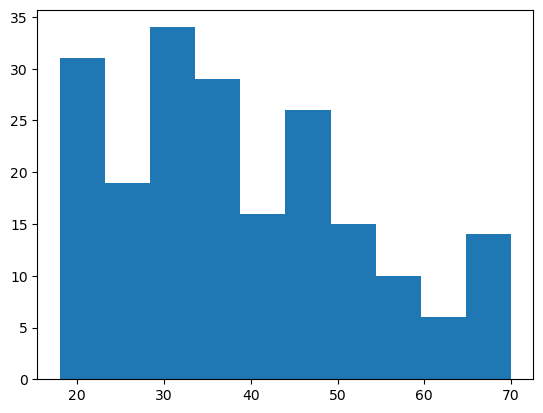

In [6]:
# visualize the distribution of a numeric column
plt.hist(df['Age'])
plt.show()

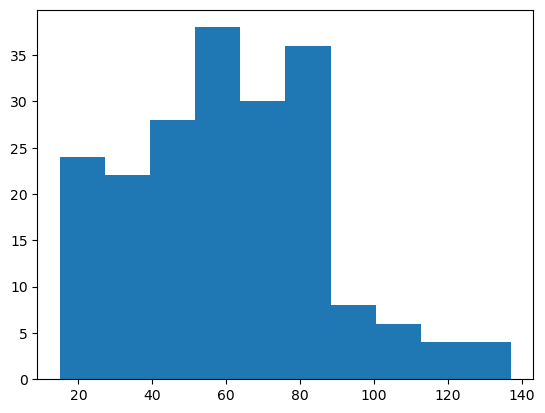

In [7]:
# visualize the distribution of a numeric column
plt.hist(df['Annual Income (k$)'])
plt.show()

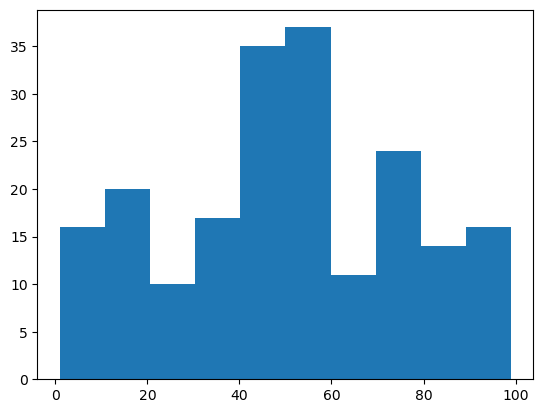

In [8]:
# visualize the distribution of a numeric column
plt.hist(df['Spending Score (1-100)'])
plt.show()

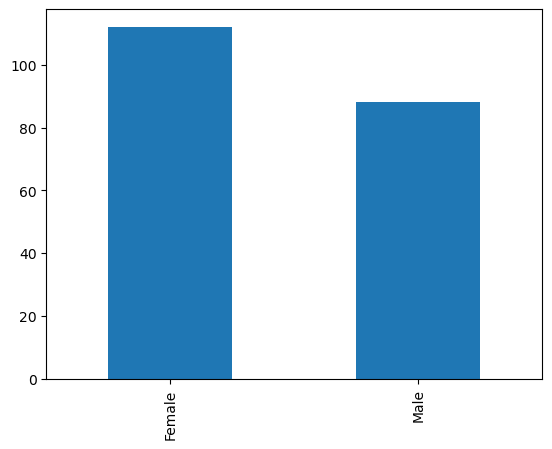

In [9]:
# visualize the distribution of a categorical column
df['Genre'].value_counts().plot(kind='bar')
plt.show()

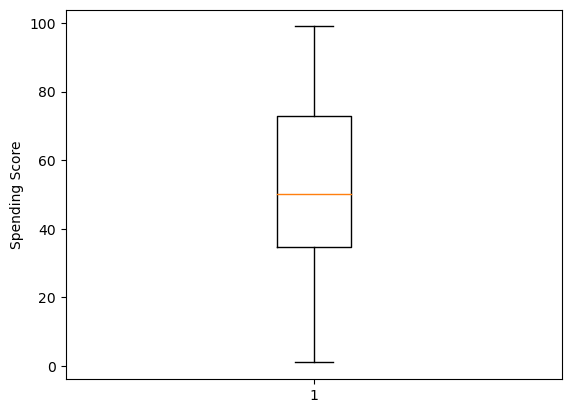

In [10]:
# create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['Spending Score (1-100)'])
plt.ylabel('Spending Score')
plt.show()

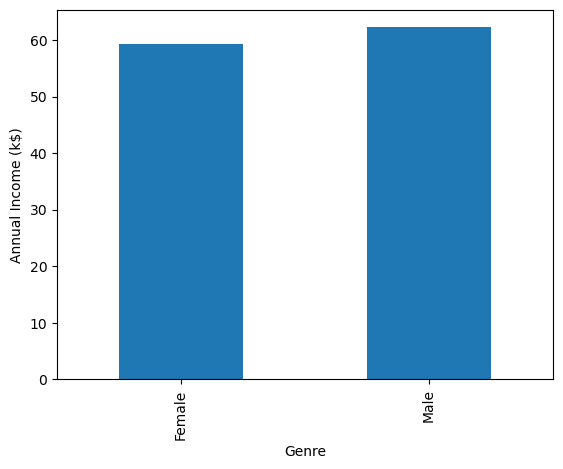

In [11]:
# create a bar plot to visualize the mean of a numeric column for each category of a categorical column
df_grouped = df.groupby('Genre')
df_grouped = df_grouped['Annual Income (k$)'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('Annual Income (k$)')
plt.show()

### Part 2: Data Preparation

Prepare the data for clustering: 

a. Perform any necessary feature scaling (StandardScaler or MinMaxScaler) 

b. Choose the appropriate features for clustering (you may start with 'Annual Income' and 'Spending Score') 

c. Create a new DataFrame with only the selected features

In [12]:
# create a copy of the original DataFrame
df_copy = df.copy()
df_copy

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
#encode categorical variable 
df_copy = pd.get_dummies(df_copy, columns=['Genre'], prefix=['Genre'])
df_copy

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [14]:
#feature selection

features = df_copy[['Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Part 3: K-means Clustering

Implement k-means clustering: 

a. Import the KMeans class from the sklearn.cluster module 

b. Use the Silhouette Method to determine the optimal number of clusters 

c. Train the KMeans model with the optimal number of clusters 

d. Obtain the cluster assignments for each data point

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

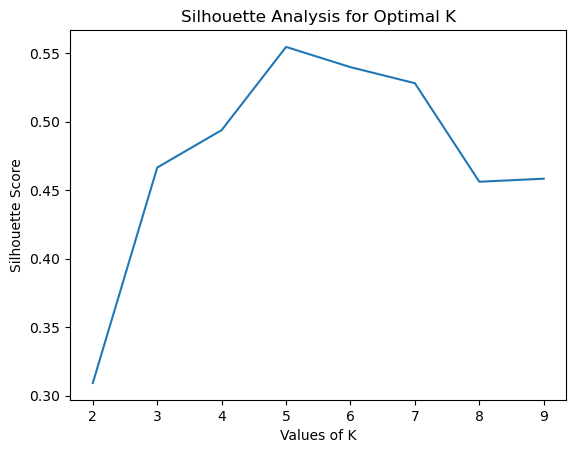

Optimal number of clusters: 5


In [17]:
# Determine the optimal number of clusters using the silhouette method
cluster_range = range(2, 10)  
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
plt.plot(cluster_range,silhouette_scores)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()
    
    
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")

In [18]:
# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(scaled_features)

KMeans(n_clusters=5)

In [19]:
# Obtain the cluster assignments for each data point
df_copy['Cluster'] = kmeans.labels_

In [20]:
# Print the DataFrame with cluster assignments
print(df_copy)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Genre_Female  Genre_Male  Cluster  
0               0           1        1  
1               0           1        3  
2               1           0        1  
3               1  

### Part 4: Visualize and Analyze Clusters 

Visualize and analyze the clusters: 

a. Create a scatter plot of the selected features, colored by cluster assignment 

b. Interpret the clusters and provide a brief description of each cluster 

c. (Optional) Perform the same analysis with different sets of features and compare the results

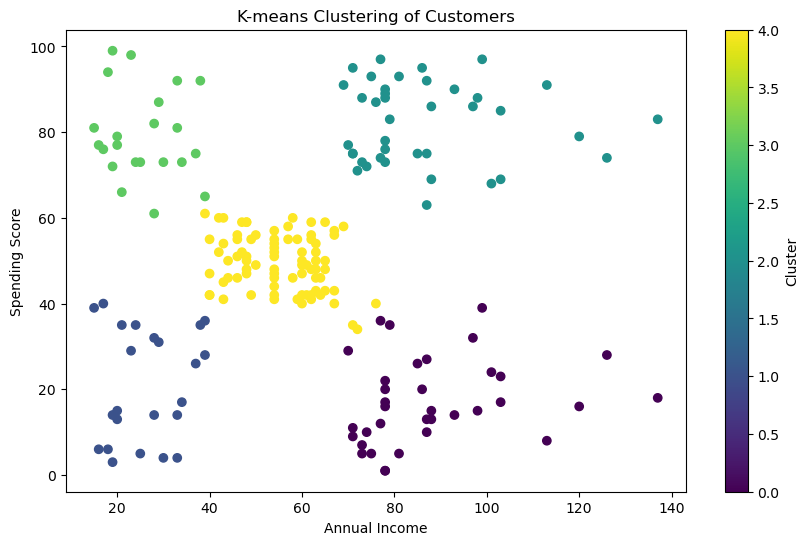

In [21]:
# Select 'Annual Income' and 'Spending Score' for visualization
x_axis = df_copy['Annual Income (k$)']
y_axis = df_copy['Spending Score (1-100)']

# Create a scatter plot colored by cluster assignment
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_axis, y_axis, c=df_copy['Cluster'])

# Add a colorbar legend
plt.colorbar(scatter, label='Cluster')

# Set plot labels and title
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering of Customers')

plt.show()

Interpretation:

Cluster 1 (Purple): low spending, low annual income

Cluster 2 (Blue): low spending, high annual income

Cluster 3 (Green-Blue): low annual income, high spending power

Cluster 4 (Green): moderate annual income, moderate spending power

Cluster 5 (Yellow): high annual income, high spending power

### Part 5: Report

###### The aim of this assignment is to perform customer segmentation using the K-Means clustering algorithm in order to better understand the different types of customers in a given dataset called 'Mall_Customers." 

There are five columns in this given dataset; that are CustomerID, Gender, Age, Annual Income and spending power. Categorical variables is gender and others are numerical. The target variables for this case are annual income and spending power. 

Part 1: 
Load the dataset and perform exploratory data analysis (EDA): 

1. Import the necessary libraries (pandas, numpy, matplotlib, seaborn) 

2. Load the dataset using pandas and display the first few rows and the shape

3. Check for missing values. The results shows no missing values, so no furthur action needed. 

4. Visualize the distribution of numerical variables of 'age' 'annual income' 'spending score' using histograms. Additionally, use boxplots to visualize 'spending score' for checking outliers 

Part 2:
Data preprocessing for clustering: 

1. create a copy of the original dataframe and encode 'Gender' for dummy variable 

2. feature selection: Choose the appropriate features 'Annual income' and 'Spending score' for clustering within a new DataFrame

3. Perform feature scaling, StandardScaler 

Part 3: 
Implement k-means clustering: 

1. Import the KMeans class from the sklearn.cluster module 

2. Use the Silhouette Method to determine the optimal number of clusters and visualize a silhouette analysis

3. Train the KMeans model with the optimal number of clusters 

4. Obtain the cluster assignments for each data point

5. Create a scatter plot of the selected features, colored by cluster assignment 


Part 4: 
K-means visualization with analysis and recommendation


Cluster 1 (Purple): low spending, low annual income; They are likely to be more price-sensitive and may prioritize essential products or services. Marketing strategies targeting this segment should focus on offering affordable, high-value products and promotions.

Cluster 2 (Blue): low spending, high annual income; This may indicate a more conservative spending behavior or that they prefer to save rather than spend on your platform. To engage this segment, you could focus on showcasing the value and quality of your products or offering personalized recommendations based on their specific interests.

Cluster 3 (Green-Blue): low annual income, high spending power; This could imply that they prioritize spending on your platform, even if it means cutting back on other expenses. To retain and grow this segment, you can offer loyalty programs or exclusive discounts that reward their continued patronage.

Cluster 4 (Green): moderate annual income, moderate spending power; this group may need furthur demographic data for analysis in order to provide suitable strategy

Cluster 5 (Yellow): high annual income, high spending power; They might be more interested in premium or luxury products and services. Targeting this segment could involve offering tailored recommendations, premium services, or exclusive products that cater to their tastes and preferences.